In [41]:
# import the necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# modelling

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [42]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Preparing the X variable and Y variable

In [43]:
X = df.drop(columns=['math_score'], axis=1)

In [44]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [45]:
print('Categories in gender variable : ' , end=' ')
print(df['gender'].unique())

print('Categories in race_ethnicty variable : ' , end=' ')
print(df['race_ethnicity'].unique())

print('Categories in lunch variable : ' , end=' ')
print(df['lunch'].unique())

print('Categories in parental_level variable : ' , end=' ')
print(df['parental_level_of_education']. unique())

print('Categories in test_prepreation variable : ' , end=' ')
print(df['test_preparation_course'].unique())

Categories in gender variable :  ['female' 'male']
Categories in race_ethnicty variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in lunch variable :  ['standard' 'free/reduced']
Categories in parental_level variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in test_prepreation variable :  ['none' 'completed']


In [46]:
y = df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [47]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [49]:
# Create column Transformer with 3 tyoe of transformer

num_feature = X.select_dtypes(exclude='object').columns
cat_feature = X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    [
        ('onehotencoder' , oh_transformer, cat_feature),
        ('standardscaler' , numeric_transformer, num_feature)
    ]
)

In [50]:
X.shape

(1000, 7)

In [51]:
X = preprocessor.fit_transform(X)

In [52]:
y.shape

(1000,)

In [53]:
X.shape

(1000, 19)

# Seperate the dataset intp train and test


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [56]:
X_train.shape

(800, 19)

In [57]:
X_test.shape

(200, 19)

# Create a function which give all the metrics after the model train

In [58]:
def evalution(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    r2_square = r2_score(true, predicted)
    rmse = np.sqrt(mse)

    return mae , rmse, r2_square

In [60]:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'K-Neighbors Regressor' : KNeighborsRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'XGBRegressor' : XGBRegressor(),
    'CatBoostRegressor' :CatBoostRegressor(),
    'AdaBoostRegressor' : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # make a prediction

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evalute the train and test dataset

    model_train_mae , model_train_rmse , model_train_r2 = evalution(y_train, y_train_pred)
    model_test_mae , model_test_rmse , model_test_r2 = evalution(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance For Trainig set')
    print('- Root mean Squareed error {:.4f}' .format(model_train_rmse))
    print('- mean absolute error {:.4f}' .format(model_train_mae))
    print('- r2_score {:.4f}' .format(model_train_r2))

    print('------------------------------------------------------------------')


    print('Model Performance For test set')
    print('- Root mean Squareed error {:.4f}' .format(model_test_rmse))
    print('- mean absolute error {:.4f}' .format(model_test_mae))
    print('- r2_score {:.4f}' .format(model_test_r2))
    r2_list.append(model_test_r2)
    print('='*20)
    print('\n')




Linear Regression
Model Performance For Trainig set
- Root mean Squareed error 5.3231
- mean absolute error 4.2667
- r2_score 0.8743
------------------------------------------------------------------
Model Performance For test set
- Root mean Squareed error 5.3940
- mean absolute error 4.2148
- r2_score 0.8804


Lasso
Model Performance For Trainig set
- Root mean Squareed error 6.5938
- mean absolute error 5.2063
- r2_score 0.8071
------------------------------------------------------------------
Model Performance For test set
- Root mean Squareed error 6.5197
- mean absolute error 5.1579
- r2_score 0.8253


Ridge
Model Performance For Trainig set
- Root mean Squareed error 5.3233
- mean absolute error 4.2650
- r2_score 0.8743
------------------------------------------------------------------
Model Performance For test set
- Root mean Squareed error 5.3904
- mean absolute error 4.2111
- r2_score 0.8806


K-Neighbors Regressor
Model Performance For Trainig set
- Root mean Squareed error

In [62]:
pd.DataFrame(list(zip(model_list, r2_list)) , columns=['Model_name' , 'R2_score']).sort_values(by=['R2_score'], ascending=False)

,Model_name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.880433
8,AdaBoostRegressor,0.852269
7,CatBoostRegressor,0.851632
5,Random Forest Regression,0.849253
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.757149


# Linear Regression

In [63]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(score)

0.8804332983749565


# plot the y_pred and y_test

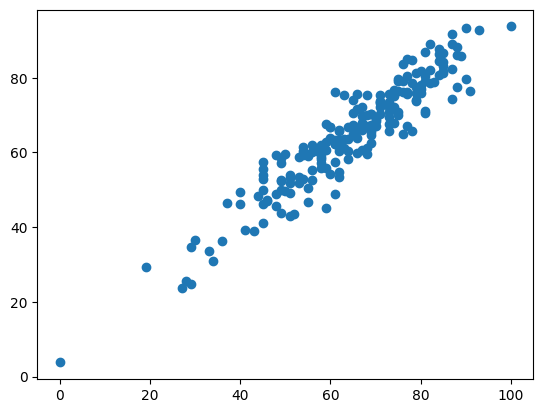

In [64]:
plt.scatter(y_test, y_pred)


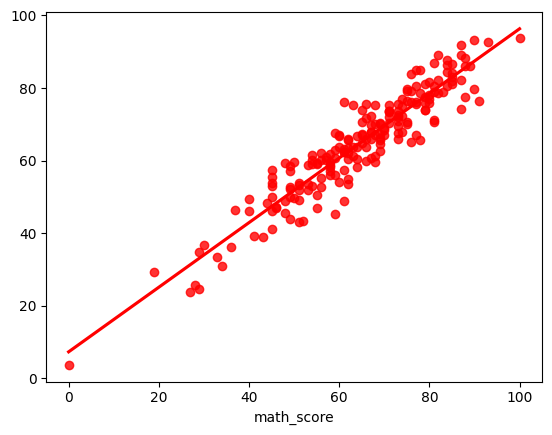

In [67]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

# DIfference between actual and predicted value

In [68]:
pred_diff = pd.DataFrame({'Actual' : y_test, 'predicted' : y_pred, 'diff' : y_test-y_pred})


In [69]:
pred_diff

,Actual,predicted,diff
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
